In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
%matplotlib inline

# Leitura do arquivo CSV
data = pd.read_csv(r'CovidNumerico.csv')
# Checando valores nulos
data.isna().sum()

x                        0
data                     1
casosAcumulado           1
casosNovos               1
obitosAcumulado          1
obitosNovos              1
Recuperadosnovos         1
emAcompanhamentoNovos    1
dtype: int64

In [29]:
# Interpolação para excluir valores nulos
data_int = data.interpolate()
# Criando lista com o nome das colunas
colunas = list(data_int.columns)

# Aplicação do filtro de Savitsky-Golay
largura = 5
ordem_polinomio = 2
passadas = 10
# Coluna de dados a ser suavizada
indice = 3




In [30]:
# Aplicando o filtro
filtrado = {}

for i in range(2, len(colunas)):
    filtrado[colunas[i]] = ss.savgol_filter(data_int[colunas[i]], largura, ordem_polinomio)
if passadas>1:
    for i in range(2, passadas):
        for i in range(2,len(colunas)):
            filtrado[colunas[i]] = ss.savgol_filter(filtrado[colunas[i]], largura, ordem_polinomio)




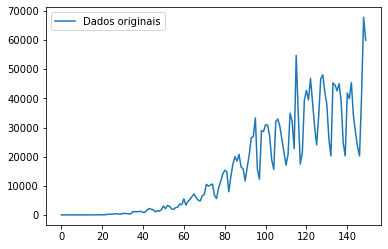

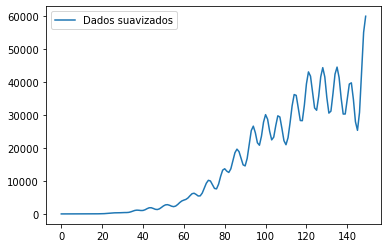

In [31]:
# Plotagem dos dados originais e dos dados suavizados e escolhendo o intervalo de dados a ser filtrado
plt.plot(data_int[colunas[indice]][0:150], label="Dados originais")
plt.legend()
plt.show()
plt.plot(filtrado[colunas[indice]][0:150], label="Dados suavizados")
plt.legend()
plt.show()